# Part 2. Deep Learning Frameworks

Before we go into deep learning modelling, we will first need to have a quick familiarisation with a deep learning framework. We recommend __[Keras](https://keras.io)__, which is built on top of Tensorflow, but alternatively, you can consider __[PyTorch](https://pytorch.org)__. Resources are abundant online on how to use them, but here are some official guides to get you started:
- PyTorch has a [60 Minute Blitz Guide](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)
- Tensorflow has an [Intro to Keras guide](https://www.tensorflow.org/guide/keras)

A few words on the difference between Keras and PyTorch - Keras is a high level wrapper on top of Google's Tensorflow, the most popular deep learning framework out there. Being more low level, Tensorflow faces many issues and troubles, which are addressed by the abstractions of Keras, making it a great way to start. Facebook's PyTorch on the other hand is a newcomer which has received massive interest in recent years, and is playing catch up to Tensorflow/Keras.

If you are more interested in how deep learning software has evolved since the days of Caffe and Theano as well as more in depth into what is happening in the software behind the scenes, we also recommend a [full lecture from Stanford](https://www.youtube.com/watch?v=6SlgtELqOWc) on this topic, although this is extra knowledge that isn't fully critical to this week.

Base on the tutorials you go through, you should be ready to build a 2 (or more) layer Multi-Level Perceptron (MLP) with deep learning. With the dataset you have prepared your machine learning model in the previous section, run your data through a MLP model with `Dense` (`Linear`) layers instead. Do some slight model adjustments, and discuss what kind of adjustments lead to improvements in score.

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from src.load_img import LoadImage
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
imgloader = LoadImage()
imgloader.load_unpickledata()
train_data,train_labels,test_data,test_labels=imgloader.getData()

## 1. Data transformations/preprocessing

Most neural networks expect the images of a fixed size. Therefore, you will need to write some prepocessing code. At the basic level, you will need to normalise the data. Use the appropriate data generator/loader methods to encapsulate your data for training purposes. Do the same for both the train and test (and val, if exist) sets.

__Normalizing Image Data__
- Instead of standard scaling, which will result in negative values.
- Since we know image pixels are bounded by 0-255 range, we normalize them between this range

In [3]:
train_data=train_data/255
test_data=test_data/255
n_classes = 10
train_labels = keras.utils.to_categorical(train_labels, n_classes)
test_labels = keras.utils.to_categorical(test_labels, n_classes)

In [4]:
X_train,X_test,y_train,y_test= train_test_split(train_data,train_labels,test_size=0.25,random_state=42)

## 2.  Build multi-layer perceptron neural network models with Keras 

The Keras Python library for deep learning focuses on the creation of models as a sequence of layers.

In here, you will discover the simple components that you can use to create neural networks and simple deep learning models using Keras.

In [30]:
numofFeatures=train_data.shape[1]
model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(numofFeatures,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

## 3. Train the MLP network in CIFAR-10

The main objective is to train the MLP network to achieve a balance between the ability to respond correctly to the input patterns that are used for training and the ability to provide good response to the input that is similar. Use the stochastic gradient descent optimiser with an appropriate learning rate between 1e-2 and 1e-3. Report your evaluation loss and accuracy, and you can also consider doing things like early stopping to prevent overfitting and achieve the best model.

In [31]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.fit(X_train,y_train,epochs=3, validation_data=(X_test,y_test))

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 6s 166us/step - loss: 2.3025 - acc: 0.0981 - val_loss: 2.3031 - val_acc: 0.1011
Epoch 2/3
37500/37500 [==============================] - 6s 165us/step - loss: 2.3020 - acc: 0.1014 - val_loss: 2.3024 - val_acc: 0.1018
Epoch 3/3
37500/37500 [==============================] - 6s 164us/step - loss: 2.3019 - acc: 0.1008 - val_loss: 2.3031 - val_acc: 0.1015


In [33]:
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6725511363983154
Test accuracy: 0.396


__Batch Size__ <br>
-Increaseing the batch size, gives a boost in the val_accuracy

In [64]:
numofFeatures=train_data.shape[1]
model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(numofFeatures,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=3, validation_data=(X_test,y_test),batch_size=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 156s 4ms/step - loss: 2.3263 - acc: 0.0980 - val_loss: 2.3106 - val_acc: 0.1010
Epoch 2/3
37500/37500 [==============================] - 153s 4ms/step - loss: 2.3243 - acc: 0.0989 - val_loss: 2.3163 - val_acc: 0.0970
Epoch 3/3
37500/37500 [==============================] - 164s 4ms/step - loss: 2.3225 - acc: 0.1011 - val_loss: 2.3270 - val_acc: 0.0975


In [55]:
numofFeatures=train_data.shape[1]
model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(numofFeatures,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=3, validation_data=(X_test,y_test),batch_size=500)

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 2s 43us/step - loss: 2.0204 - acc: 0.2705 - val_loss: 1.8755 - val_acc: 0.3318
Epoch 2/3
37500/37500 [==============================] - 1s 32us/step - loss: 1.7971 - acc: 0.3647 - val_loss: 1.7369 - val_acc: 0.3864
Epoch 3/3
37500/37500 [==============================] - 1s 31us/step - loss: 1.7156 - acc: 0.3979 - val_loss: 1.6818 - val_acc: 0.4079


__Varying Learning Rates and early stopping__

In [56]:
results=np.zeros((0,2))
lr_val=[0.001,0.005,0.01]
#Monitor for 3 epochs if loss doesnt imporve

for lr in lr_val:
    numofFeatures=train_data.shape[1]
    model=Sequential()
    model.add(Dense(100, activation='relu', input_shape=(numofFeatures,)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10, activation='softmax'))

    early_stopping_monitor = EarlyStopping(patience=3)

    sgd = optimizers.SGD(lr=lr_val[2], decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=20, validation_data=(X_test,y_test),callbacks=[early_stopping_monitor])
    
    tmp=np.zeros((len(history.history['val_acc']),2))
    tmp[:,0]=lr
    tmp[:,1]=history.history['val_acc']
    
    results=np.vstack((results,tmp))

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 7s 186us/step - loss: 1.8636 - acc: 0.3225 - val_loss: 1.7279 - val_acc: 0.3720
Epoch 2/20
37500/37500 [==============================] - 6s 173us/step - loss: 1.7157 - acc: 0.3839 - val_loss: 1.7025 - val_acc: 0.3868
Epoch 3/20
37500/37500 [==============================] - 7s 178us/step - loss: 1.6516 - acc: 0.4075 - val_loss: 1.6212 - val_acc: 0.4147
Epoch 4/20
37500/37500 [==============================] - 7s 173us/step - loss: 1.6140 - acc: 0.4238 - val_loss: 1.6026 - val_acc: 0.4260
Epoch 5/20
37500/37500 [==============================] - 7s 173us/step - loss: 1.5879 - acc: 0.4347 - val_loss: 1.5906 - val_acc: 0.4308
Epoch 6/20
37500/37500 [==============================] - 7s 182us/step - loss: 1.5641 - acc: 0.4366 - val_loss: 1.6454 - val_acc: 0.4161
Epoch 7/20
37500/37500 [==============================] - 6s 157us/step - loss: 1.5525 - acc: 0.4443 - val_loss: 1.5766 - 

In [60]:
df= pd.DataFrame(results,columns=['Learning Rate','Validation Accuracy'])

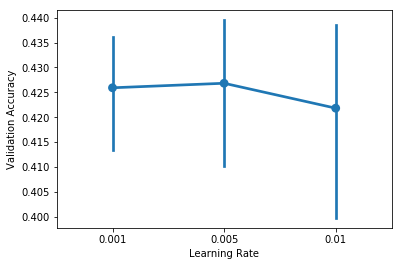

In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pointplot(x="Learning Rate",y="Validation Accuracy",data=df)

__Testing Accuracy__

In [2]:
numofFeatures=train_data.shape[1]
model=Sequential()
model.add(Dense(100, activation='relu', input_shape=(numofFeatures,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

early_stopping_monitor = EarlyStopping(patience=3)

sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20, validation_data=(X_test,y_test),callbacks=[early_stopping_monitor])

NameError: name 'train_data' is not defined